In [1]:
import pandas as pd
DataSet = pd.read_csv("titanic_data_set.csv")
print DataSet


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [2]:
DataSet.shape

(891, 12)

In [3]:
DataSet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
DataSet.describe(include = ['O'])


,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27
freq,1,7,4


In [5]:
DataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
srv = DataSet[DataSet['Survived'] == 1]
not_srv = DataSet[DataSet['Survived'] == 0]
print 'Survived ', srv.head(), '\n\nNot Survived ', not_srv.head()

Survived     PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name  Sex   Age  SibSp  Parch  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  27.0      0      2   
9                Nasser, Mrs. Nicholas (Adele Achem)    0  14.0      1      0   

             Ticket     Fare Cabin  Embarked  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
8            347742  11.1333   NaN         2  
9            237736  30.0708   NaN         0   

No

In [49]:
print "Survived: %i (%f%%)" % (len(srv), float(len(srv))/len(DataSet)*100.0)
print "Not Survived: %i (%f%%)" % (len(not_srv), float(len(not_srv))/len(DataSet)*100.0)
print "Total : %i" % len(DataSet)

Survived: 342 (38.383838%)
Not Survived: 549 (61.616162%)
Total : 891


In [8]:
DataSet.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
DataSet.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [10]:
DataSet.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
DataSet.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

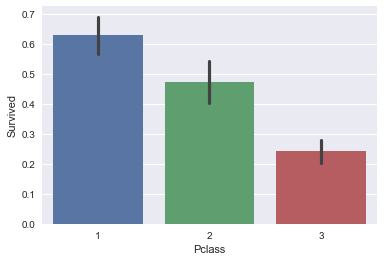

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
DataSet.head()
sns.barplot(x='Pclass', y='Survived', data=DataSet)


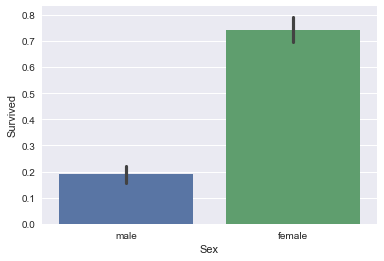

In [13]:
sns.barplot(x='Sex', y='Survived', data=DataSet)

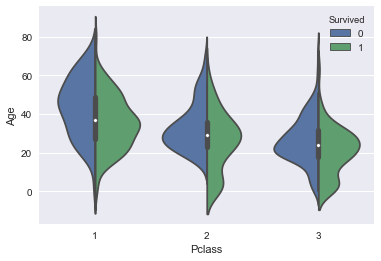

In [14]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=DataSet, split=True)

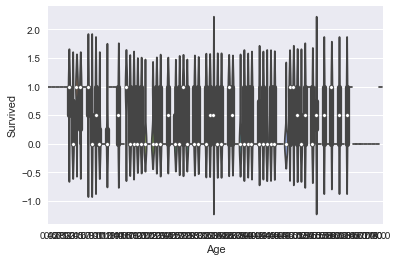

In [15]:
sns.violinplot(x='Age', y='Survived', data=DataSet, split=True)

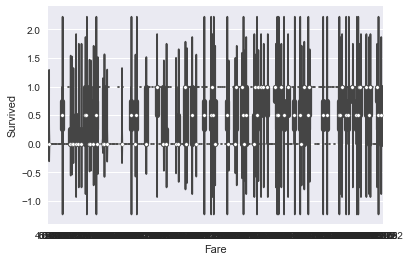

In [16]:
sns.violinplot(x='Fare', y='Survived', data=DataSet, split=True)

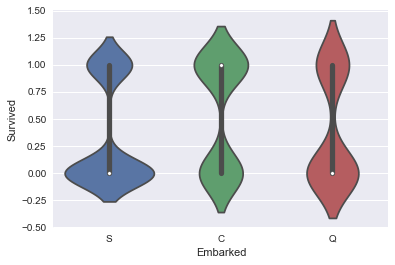

In [17]:
sns.violinplot(x='Embarked', y='Survived', data=DataSet, split=True)

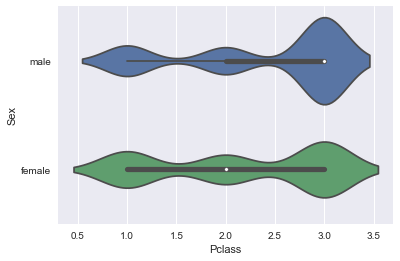

In [18]:
sns.violinplot(x='Pclass', y='Sex', data=DataSet, split=True)

In [19]:
DataSet.head()
DataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
from sklearn.preprocessing import Imputer
ageimputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
ageimputer = ageimputer.fit(DataSet.iloc[ : , [5]])
DataSet.iloc[:, [5]] = ageimputer.transform(DataSet.iloc[:, [5]])
DataSet.Embarked.value_counts()
DataSet['Embarked'] = DataSet['Embarked'].fillna('S')
DataSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoderSex = LabelEncoder()
DataSet.iloc[:, [4]] = labelencoderSex.fit_transform(DataSet.iloc[:, [4]])
print DataSet.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [55]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
DataSet.iloc[:, [11]] = labelencoder_embarked.fit_transform(DataSet.iloc[:, [11]])
DataSet.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [56]:
Df = pd.get_dummies(DataSet, columns=['Pclass', 'Embarked'])
Df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [57]:
Df['FamilySize'] = Df['SibSp'] + Df['Parch'] + 1
print Df.head()


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin  Pclass_1  \
0    1  22.0      1      0         A/5 21171   7.2500   NaN         0   
1    0  38.0      1      0          PC 17599  71.2833   C85         1   
2    0  26.0      0      0  STON/O2. 3101282   7.9250   NaN         0   
3    0  35.0      1      0            113803  53.1000  C123         1   
4    1  35.0      0      0            373450   8.0500   NaN         0   

   Pclass_2  Pclass_3  Embarked_0  Embarked_1  Embarked_2  FamilySize  
0         0   

In [58]:
irrelevantFeatures = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df = DataSet.drop(irrelevantFeatures, axis=1)
print df.head()

   Survived  Pclass  Sex   Age     Fare  Embarked
0         0       3    1  22.0   7.2500         2
1         1       1    0  38.0  71.2833         0
2         1       3    0  26.0   7.9250         2
3         1       1    0  35.0  53.1000         2
4         0       3    1  35.0   8.0500         2


In [29]:
Df.to_csv('titanic_prepared_data.csv', index=False)

In [59]:
import pandas as pd
p = pd.read_csv('titanic_prepared_data.csv')
p.head()  



,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [62]:
X = p.iloc[:, 1:].values
y = p.iloc[:, 0:1].values
print X.shape, y.shape

(891, 5) (891, 1)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print X_train.shape, y_train.shape

(623, 5) (623, 1)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)
acc_log = round( accuracy_score(y_pred, y_test) * 100, 2)
print (str(acc_log) + ' %')

79.1 %


In [65]:
from sklearn.neighbors import KNeighborsClassifier
clfKnn = KNeighborsClassifier(n_neighbors = 3)
clfKnn.fit(X_train, y_train.ravel())
y_pred_knn = clfKnn.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
acc_knn = round( accuracy_score(y_pred_knn, y_test) * 100, 2)
print (str(acc_knn) + ' percent')

68.66 percent


In [67]:
from sklearn.naive_bayes import GaussianNB
c = GaussianNB()
c.fit(X_train, y_train.ravel())
y_pred_gnb = c.predict(X_test)
from sklearn.metrics import accuracy_score
accgnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(accgnb) + ' percent')

78.36 percent


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())
y_pred_decision_tree = clf.predict(X_test)
acc_decision = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision) + ' percent')

77.24 percent


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.ravel())
y_pred_random_forest = clf.predict(X_test)
from sklearn.metrics import accuracy_score
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

82.09 percent


In [74]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree',
              'Random Forest', 'Naive Bayes'],

    'Score': [acc_log, acc_knn,acc_decision,
              acc_random_forest, acc_gnb]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,82.09
0,Logistic Regression,79.10
4,Naive Bayes,78.36
2,Decision Tree,77.24
1,KNN,68.66
